## Inicializando a automatização 

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud


url = 'https://g1.globo.com/busca/?q=ucrania'
options = Options() 
options.headless = True #impossibilita a abertura do browser
driver = webdriver.Chrome(r'C:\Users\Acer\OneDrive\Documentos\chrome_webdriver\chromedriver', options=options)
driver.get(url)

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Encontrando e capturando as informações desejadas

In [5]:
element = driver.find_element_by_id("content")
html = element.get_attribute('outerHTML')
print(element)
html = element.get_attribute('outerHTML')
driver.quit() #encerra a captura de dados

soup = BeautifulSoup(html, 'lxml') #comanda ao bs4 que o conteúdo obtido seja interpretado como HTML.

texto = [] #aqui criamos uma lista vazia e depois adicionamos as palavras que queremos para o wordcloud

for bloco in soup.find_all(class_='widget--info__text-container'): #captação de todos os títulos e subtitulos dentro do element
    for href in bloco.find_all('a'):
        title = href.find(class_="widget--info__title product-color")
        if(title):
            print('titulo',title.text[7:-2])
            texto.append(title.text[7:-2])
        subtitle = href.find(class_="widget--info__description")
        if(subtitle):
            texto.append(subtitle.text)
texto = ' '.join(texto)
#print(texto)

<selenium.webdriver.remote.webelement.WebElement (session="7cf82e7a84c9a095e52976a3b5e131a4", element="151a8c2d-2fb2-4317-b6af-7beadee13d37")>
titulo   Presidente da Ucrânia participa de sessão do Parlamento alemão
    
titulo   A outra guerra cruel de Putin: contra os russos que se opõem à invasão da Ucrânia
    
titulo   Que armas os EUA darão à Ucrânia — e qual o possível impacto na guerra
    
titulo   Guerra na Ucrânia prejudica produção de grãos, mas previsão ainda é de crescimento
    
titulo   Guerra na Ucrânia: o que Putin precisa para acabar com a invasão
    
titulo   Ucrânia é atingida por novos ataques russos na cidade de Lviv
    
titulo   Zelensky cita possibilidade de a Ucrânia entrar para a União Europeia
    
titulo   Torcedores sérvios pedem fim da guerra entre Rússia e Ucrânia
    
titulo   MAPAS: guerra na Ucrânia, invasão russa, bombardeios e ataque a Kiev
    
titulo   Guerra na Ucrânia: as 6 exigências de Putin para acabar com o conflito
    
titulo   ‘A Rússia 

# # Criação do wordcloud

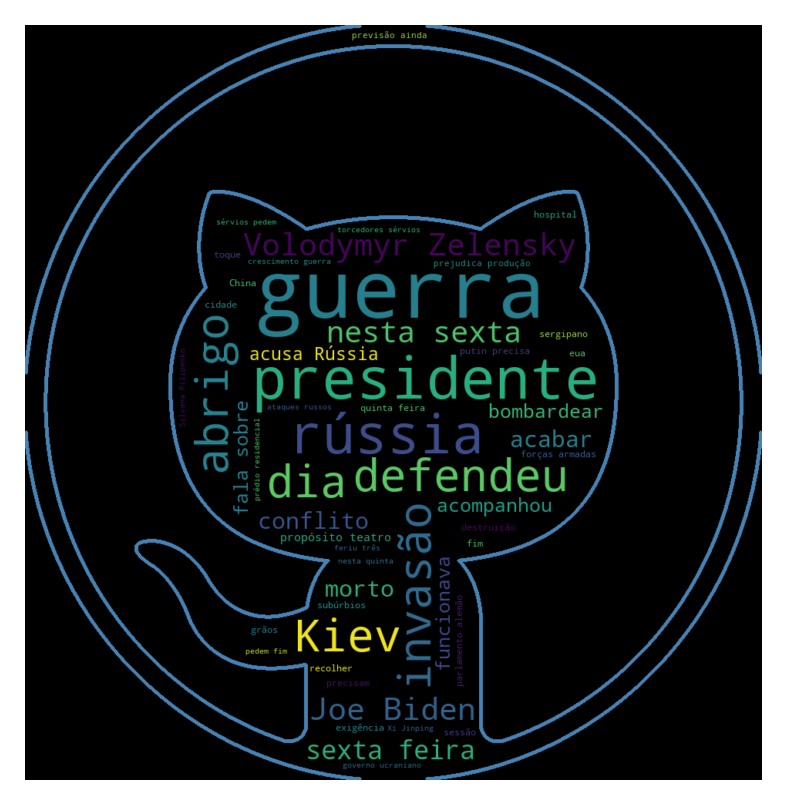

In [7]:
stopwords = nltk.corpus.stopwords.words('portuguese') + ['ucrânia']
comment_words = ''

words = texto.split()

for i in range(len(words)):
    words[i] = words[i].lower()
    comment_words += " ".join(words)+" "
    
    
mask = np.array(Image.open(r'C:\Users\Acer\OneDrive\Documentos\ucrania_scraping-main\github_mask.png'))

wordcloud = WordCloud(mask = mask, margin = 10,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10, contour_width=5, contour_color='steelblue').generate(comment_words)

default_colors = wordcloud.to_array()
plt.figure(dpi=250)
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
#plt.savefig(r'C:\Users\Acer\OneDrive\Documentos\ucrania_scraping-main\mascara-final.png', bbox_inches='tight')
plt.show()

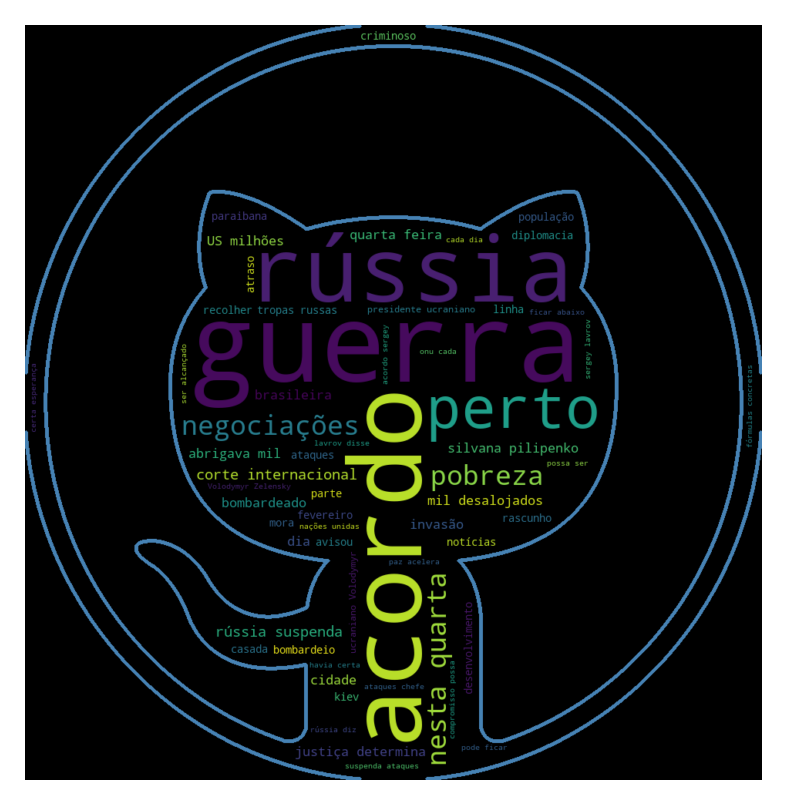